In [22]:
pip install scipy

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [45]:
import numpy as np
import pandas as pd
import scipy.stats as st
from math import factorial
from matplotlib import pyplot as plt
# from scipy.integrate import quad
# from scipy.stats import binom
# from scipy.stats import poisson
# from scipy.stats import expon
# from scipy.stats import norm

# 1 - Informações sobre o Módulo - OK

# 2 - Estatística Descritiva - OK

Dados Qualitativos e Quantitativos.

Dos **QUANTITATIVOS** podemos fazer algumas análises:

## Métricas de Posição:

* Média Aritmética
* Mediana
* Moda
* Quartis

## Métricas de Dispersão

* Amplitude
* Variância (quadrática)
* Desvio Padrão (variância ajustada)

## Associação entre Variáveis Quantitativas

* Covariância
* Correlação

**GRÁFICO BOXPLOT**

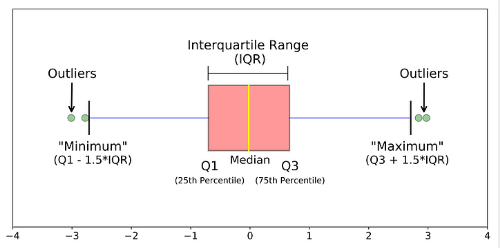

# 3 - Probabilidade - OK

## Métodos de Avaliação da Probabilidade

In [24]:
# Número de experimentos
N = 1000000

# Definindo os resultados de um dado a partir de números aleatórios entre 1 e 6
amostra = np.random.randint(low = 1, high = 7, size = N)

# Convertendo a amostra para uma Séries e calculando as frequências relativas
print(pd.Series(amostra).value_counts(normalize = True))

5    0.167135
2    0.166928
6    0.166734
3    0.166550
4    0.166446
1    0.166207
Name: proportion, dtype: float64


## Probabilidade da União de Eventos

Dados dois eventos aleatórios quaisquer A e B, o cálculo da probabilidade da união desses eventos.

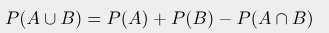

Exemplificando com uma aplicação, qual seria a probabilidade que em um lançamento de dado saia um **número par ou maior ou igual a 3**?

In [25]:
# Probabilidade de ser par [2,4,6]
p_a = 3/6

# Probabilidade de ser um número maior ou igual a 3 [3,4,5,6]
p_b = 4/6

# Interseção das probabilidades (ser par E maior ou igual a 3) [4,6]
p_i = 2/6

# Aplica-se a fórmula:
result = p_a + p_b - p_i
print(f'A probabilidade de sair um número par OU maior-igual a três é: {round(result*100, 2)}%')

A probabilidade de sair um número par OU maior-igual a três é: 83.33%


## Probabilidade Condicional

Sejam dois eventos aleatórios A e B. Define-se a probabilidade condicional entre esses eventos pela seguinte relação.

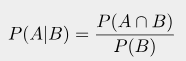

Por exemplo, qual a probabilidade de, ao lançar um dado, sair um número ímpar, dado que o número que saiu é maior do que 2?

In [26]:
# Probabilidade de ser um número maior do que dois [3,4,5,6]
p_b = 4/6

# Interseção das probabilidades (ser ímpar E maior do que dois) [3,5]
p_i = 2/6

# Aplica-se a fórmula:
result = p_i / p_b
print(f'A probabilidade de sair um número ímpar sabendo que o número que saiu é maior que dois: {round(result*100, 2)}%')

A probabilidade de sair um número ímpar sabendo que o número que saiu é maior que dois: 50.0%


## Teorema de Bayes

A ideia principal do Teorema de Bayes é inverter as probabilidades condicionais.

Por exemplo, queremos saber a probabilidade P(A|B) mas conhecemos apenas a probabilidade de P(B|A).

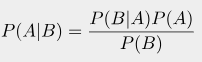

Um exemplo de aplicação deste teorema seria na avaliação de um determinado teste B em identificar uma doença A. Sabe-se que 1% das pessoas possui uma certa doença A, além disso o teste B não é totalmente confiável: ele acerta 90% dos casos positivos e 95% dos casos negativos. Qual a probabilidade de uma pessoa que fez o teste estar realmente doente, dado que o teste deu positivo?

In [27]:
# Probabilidade do teste A dar doente
p_a = 1/100

# Probabilidade da pessoa estar doente uma vez que o teste A deu doente
p_b_a = 90/100

# Probabilidade do teste B dar doente (considera as duas condições)
# Probabilidade do teste B dar doente e a pessoa estar doente
p_b_d = 90/100 * 1/100
# Probabilidade do teste B dar saudável e a pessoa estar doente
p_b_s = 5/100 * 99/100

p_b = p_b_d + p_b_s

# Aplicando o teorema:

result = (p_b_a * p_a) / p_b
print(f'A probabilidade da pessoa que fez o teste e deu DOENTE estar de fato DOENTE é: {round(result*100, 2)}%')

A probabilidade da pessoa que fez o teste e deu DOENTE estar de fato DOENTE é: 15.38%


# 4 - Distribuições de Probabilidade - EM ANDAMENTO

* Função de Probabilidade (caso discreto)

1.png

* Função de Densidade de Probabilidade (caso contínuo)

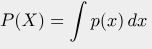

* Valor Esperado (Esperança) [Equivalente a MÉDIA]:

O valor esperado seria o produto da variável aleatória x e sua respectiva probabilidade, funcionando como se fosse uma **média ponderada para as probabilidades**.

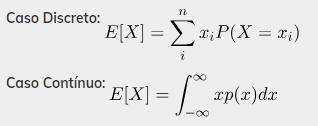

* Variância [Equivalente a DESVIO PADRÃO]:

A variância é o valor que mede a variabilidade, ou seja o quão dispersão estão as probabilidades em relação ao valor esperado.

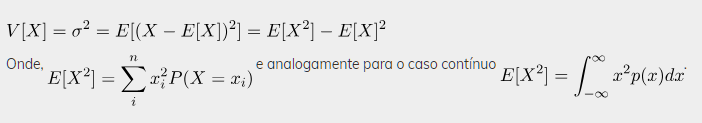

In [28]:
# EXEMPLO: Caso Discreto

# Vetor de eventos
X = [1, 2, 3, 4]

# Vetor de probabilidades
P = [0.3, 0.4, 0.2, 0.1]

# Cálculo do Valor esperado
esp = np.dot(X, P)
print("Valor Esperado: ", np.round(esp, 2))

# Cálculo da variância
var = np.round(np.dot(np.power(X, 2), P) - np.power(esp, 2), 2)
print("Variância: ", var)

Valor Esperado:  2.1
Variância:  0.89


In [29]:
# EXEMPLO: Caso Contínuo

# Função para a equação do valor esperado
def funcao_vlr_esperado(x):
    return x*(x*x)/3

# Cálculo da integral e o erro a partir da função anterior
esp, erro1 = quad(funcao_vlr_esperado, -1, 2)

# Print do valor esperado
print("Valor Esperado: ", esp)
print("Erro da Integral: ", erro1)

# Função para a equação do valor esperado x^2 a partir da função anterior
def funcao_variancia(x):
    return (x*x)*(x*x)/3

# Integral de x^2
esp_x2, erro2 = quad(funcao_variancia, -1, 2)

# Cálculo da variância
var = esp_x2 - esp*esp

# Print da variância
print("Variância:      ", round(var, 2))
print("Erro da Integral: ", erro2)

Valor Esperado:  1.25
Erro da Integral:  1.5728145305099745e-14
Variância:       0.64
Erro da Integral:  2.4424906541753447e-14


## Distribuição de Bernoulli

A distribuição de Bernoulli, trata-se apenas para um evento isolado, como por exemplo o lançamento de uma moeda. Quando o problema envolve eventos com repetições, utiliza-se o caso geral da distribuição de Bernoulli que seria uma Distribuição Binomial.

## Distribuição Binomial

Exemplo: Em uma caixa há 8 bolas brancas e 4 pretas. Retira-se 5 bolas com reposição. Calcule a probabilidade de:

In [30]:
# SAIAM 2 BOLAS BRANCAS

# Número de retiradas
n = 5
# Número de brancas
k = 2
# Probabilidade de uma bola branca
p = 8/12

# Mostra o resultado
print(f"A probabilidade para este evento será: {round((binom.pmf(k, n, p) * 100), 2)} %")

A probabilidade para este evento será: 16.46 %


In [31]:
# SAIAM PELO MENOS 3 PRETAS

# Número de retiradas
n = 5
# Probabilidade de uma bola preta
p = 4/12
# Limite das retiradas
k = 2

# Calculando a probabilidade acumulada até 2 retiradas
prop = binom.cdf(k, n, p)

# Calcula a probabilidade complementar
prop_comp = 1 - prop

# Mostra o resultado da probabilidade complementar
print(f"A probabilidade para este evento será: {round((prop_comp * 100), 2)} %")

A probabilidade para este evento será: 20.99 %


## Distribuição Poisson

Exemplo: Em uma central telefônica chegam 300 ligações por hora. Sabendo que segue uma distribuição de Poisson, qual é a probabilidade de:

In [32]:
# EM 1 MINUTO NÃO OCORRA LIGAÇÕES?

# Definindo a taxa de ocorrência
mu = 5 # 300 chamadas / 60 minutos = 5 chamadas por minuto

# Frequência procurada
k = 0   # Não ocorrer ligações

# Mostra o resultado
print(f"A probabilidade para este evento será: {round((poisson.pmf(k, mu) * 100), 2)} %")

A probabilidade para este evento será: 0.67 %


In [33]:
# EM 1 MINUTO OCORRA PELO MENOS 4 LIGAÇÕES?

# Definindo a taxa de ocorrência
mu = 5 # 300 chamadas / 60 minutos = 5 chamadas por minuto

# Frequência procurada
k = 2  # Até 2 ligações para usar a probabilidade complementar

# Cálculo da probabilidade acumulada até 2 ligações
prop = poisson.cdf(k, mu)

# Cálculo da probabilidade complementar
prop_comp = 1 - prop

# Mostra o resultado
print(f"A probabilidade para este evento será: {round((prop_comp * 100), 2)} %")

A probabilidade para este evento será: 87.53 %


## Distribuição Exponencial

Exemplo: O intervalo de tempo, em minutos, entre emissões consecutivas de uma fonte radioativa é uma variável aleatória contínua que segue uma distribuição exponencial com parâmetro alpha = 0.2. Qual a probabilidade de que ocorra uma emissão em um intervalo inferior a 2 minutos?

In [34]:
# Define o parâmetro alpha
alpha = 0.2

# Mostra o resultado
print(f"A probabilidade para este evento será: {round((expon.cdf(x = 2, scale = 1/alpha) * 100), 2)} %")

A probabilidade para este evento será: 32.97 %


## Distribuição Uniforme

A distribuição uniforme é uma distribuição bem simples e não possui parâmetros, a única diferença é que só vai haver probabilidade para um determinado evento.

## EXERCÍCIOS

GitHub: https://github.com/remarchese/DS_Braskem_1015

### 1) Distribuição Binomial
Em uma caixa há 7 bolas brancas, 4 pretas e 5 vermelhas. Retira-se 6 bolas com reposição. Calcule a probabilidade de que:

A) saiam 4 bolas vermelhas

B) pelo menos 3 bolas brancas

C) 1 ou 2 bolas pretas

In [35]:
# A) SAIAM 4 BOLAS VERMELHAS

# Número de retiradas
n = 6
# Número de vermelhas a ser retirada
k = 4
# Probabilidade de uma bola vermelha
p = 5/16

# Mostra o resultado
print(f"A probabilidade para este evento será: {round((binom.pmf(k, n, p) * 100), 2)} %")

A probabilidade para este evento será: 6.76 %


In [36]:
# B) SAIAM PELO MENOS 3 BOLAS BRANCAS

b_3 = binom.pmf(3, 6, (7/16))
b_4 = binom.pmf(4, 6, (7/16))
b_5 = binom.pmf(5, 6, (7/16))
b_6 = binom.pmf(6, 6, (7/16))

result = b_3 + b_4 + b_5 + b_6
print(f"A probabilidade para este evento será: {round((result * 100), 2)} %")

A probabilidade para este evento será: 53.31 %


In [37]:
# C) SAIAM 1 OU 2 BOLAS PRETAS

p_1 = binom.pmf(1, 6, (4/16))
p_2 = binom.pmf(2, 6, (4/16))

result = p_1 + p_2
print(f"A probabilidade para este evento será: {round((result * 100), 2)} %")

A probabilidade para este evento será: 65.26 %


### 2) Distribuição Poisson

Em um livro de 800 páginas há 800 erros de impressão. Qual a probabilidade de que uma página contenha pelo menos 3 erros?

In [38]:
# EM 1 PÁGINA TENHA PELO MENOS 3 ERROS

# Definindo a taxa de ocorrência
mu = 1 # 800 erros / 800 páginas = 1 erro por página

# Frequência procurada
k = 3   # Ocorrer pelo menos 3 erros

# Mostra o resultado
print(f"A probabilidade para este evento será: {round((poisson.pmf(k, mu) * 100), 2)} %")

A probabilidade para este evento será: 6.13 %


### 3) Distribuição Binomial

Numa criação de coelhos, 45% são machos. Qual a probabilidade de nascerem pelo menos 5 coelhos machos num dia em que nasceram 15 coelhos?

In [39]:
# SAIAM PELO MENOS 5 COELHOS MACHOS

# Número de nascidos
n = 15
# Número a ser retirada Complementar (5-1)
k = 4
# Probabilidade de coelhos macho
p = 0.45

compl = binom.cdf(k, n, p)
result = 1 - compl

print(f"A probabilidade para este evento será: {round((result * 100), 2)} %")

A probabilidade para este evento será: 87.96 %


### 4) Distribuição Poisson

Numa estrada há 2 acidentes para cada 100 km. Qual a probabilidade de que em:

A) 250 km pelo menos 3 acidentes?

B) 300 km ocorram 5 acidentes?

In [40]:
# A) EM 250 km OCORRAM PELO MENOS 3 ACIDENTES

# Definindo a taxa de ocorrência
mu = 5 # 5 acidentes a cada 250 km
# Frequência procurada COMPLEMENTAR (3-1)
k = 2

compl = poisson.cdf(k, mu)
result = 1- compl

# Mostra o resultado
print(f"A probabilidade para este evento será: {round((result * 100), 2)} %")

A probabilidade para este evento será: 87.53 %


In [41]:
# B) EM 300 km OCORRA 5 ACIDENTES

# Definindo a taxa de ocorrência
mu = 6 # 6 acidentes a cada 300 km
# Frequência procurada
k = 5

# Mostra o resultado
print(f"A probabilidade para este evento será: {round((poisson.pmf(k, mu) * 100), 2)} %")

A probabilidade para este evento será: 16.06 %


# 5 - Distribuição Normal e Teorema Central do Limite

##  Distribuição Normal

A Distribuição Normal é representada por uma curva simétrica em torno da média, apresentando uma forma de sino (bell shape).

A curva da distribuição normal representa o comportamento de diversos processos e fenômenos comuns, como por exemplo: altura ou peso de uma população, a pressão sanguínea de um grupo de pessoas, o tempo que um grupo de estudantes gasta para realizar uma prova, entre outras aplicações.

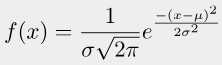

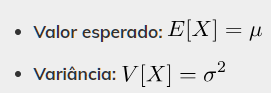

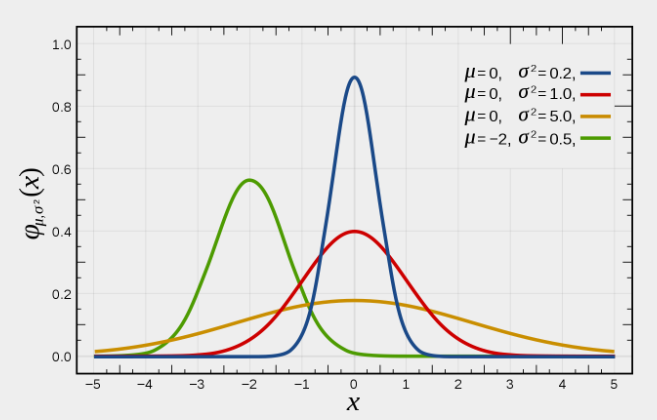

Uma propriedade da distribuição Normal é que pela sua característica simétrica, todas as métricas de posição coincidem no ponto médio (sendo elas média, mediana e moda).



### Z-Score (Normalização dos Dados)

Este parâmetro nada mais é que o número de desvios padrões que a observação está com relação à média.

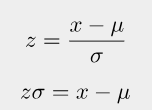

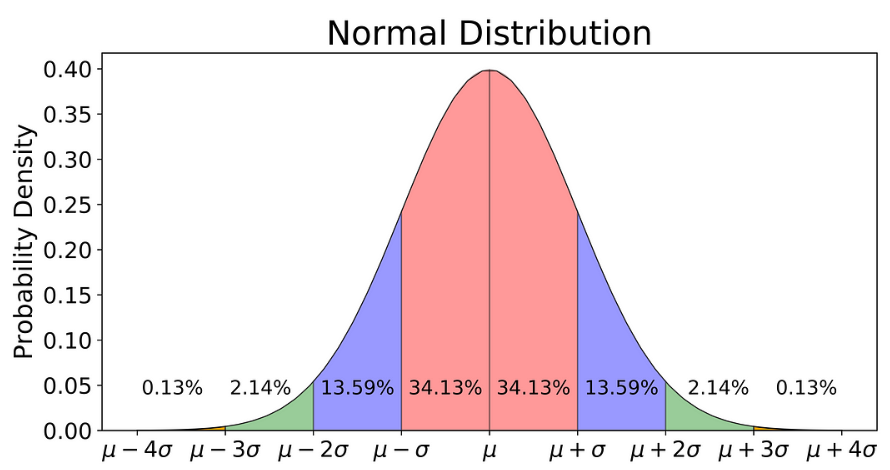

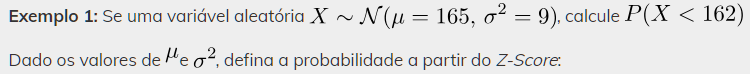

In [42]:
# Define o valor de média
mu = 165

# Define o valor de sigma (desvio padrão)
sigma = np.sqrt(9)

# Calcula o Z-Score para 162
z = (162 - mu)/sigma

# Mostra o resultado do Z-Score e da probabilidade pela distribuição normal
print('Valor do Z - Score: ', z)
print(f'Probabilidade do Evento: {st.norm.cdf(z)} ou {round((st.norm.cdf(z) * 100), 2)}%')

Valor do Z - Score:  -1.0
Probabilidade do Evento: 0.15865525393145707 ou 15.87%


In [43]:
# Valor da média
mu = 75.5

# Valor do desvio padrão
sigma = 7.5

# Calculando Z1 para 60 kg
z1 = (60 - mu)/sigma

# Calculando Z2 para 77.5 kg
z2 = (77.5 - mu)/sigma

# Mostra os valores de Z-Score e o resultado da probabilidade
print('Z - Score para 60 kg:   ', z1)
print('Z - Score para 77.5 kg: ', z2)
print('Probabilidade: ', st.norm.cdf(z2) - st.norm.cdf(z1))

Z - Score para 60 kg:    -2.066666666666667
Z - Score para 77.5 kg:  0.26666666666666666
Probabilidade:  0.5857543024471563


## Teorema Central do Limite

O Teorema Central do Limite (algumas vez denominado Teorema do Limite Central) é uma das ferramentas mais poderosas da estatística, e é esse teorema que dá fundamentação para a distribuição normal ser amplamente utilizada como base para muitos outros resultados. O princípio por trás deste teorema é que muitos dos resultados da inferência estatística são válidos assumindo a hipótese que esses dados sob análise (mais precisamente, os estimadores pontuais) seguem uma distribuição normal.

No entanto, há muitos casos de interesse em que a distribuição populacional não é normal, onde na verdade não é possível afirmar isso sobre a distribuição populacional, a partir apenas das amostras. Dado este contexto que o Teorema Central do Limite atua, pois ele mostra que os estimadores pontuais de parâmetros populacionais serão normalmente distribuídos, independente da distribuição populacional destes dados.

**Pedro: Você pega uma população que não possui um comportamento normal e pega amostras para tornar a curva uma normal e poder fazer a análise de acordo com a Distribuição Noraml.**

# 7 - Amostragem, Estimação e Inferência

Em estátistica, amostragem representa este procedimento que visa obter informações sobre o todo baseando-se no resultado de uma amostra.

* População: ou Universo é o conjunto de todas as unidades elementares de interesse. A população deve ser definida claramente e em termos da informação que se pretende conhecer;
* Unidade: trata-se de qualquer elemento da população;
* Amostra: uma parte ou subconjunto da população;
* Censo: observação de todos os elementos da população;
* Parâmetro Populacional: é o vetor correspondente a todos os valores de uma variável de interesse. Pode ser **qualitativa** (gosto musical, opinião sobre o governo, etc) ou **quantitativa** (média, proporção, quantidade, etc).
* Função Paramétrica Populacional: é uma característica numérica da população, ou seja, uma expressão numérica que condensa os valores do vetor de parâmetro populacional. Por exemplo, média, total, proporção, dentre outros.

## Tipos de Amostragem
* Amostra Probabilística: todos os elementos da população apresentam probabilidade maior que zero de serem selecionados.
* Amostra Não-Probabilística: quando não há probabilidade clara/conhecida de seleção dos elementos. Os elementos são escolhidos de forma julgamental.

## Quando utilizar amostras
* Populações infinitas: Quando é impossível investigar todos os elementos de uma população;
* Teste Destrutivos: Estudos onde os elementos avaliados passaram por algum processo de transformação, sendo este processo destrutivo para a amostra. Exemplo: Ensaio sobre fadiga em asas de avião;
* Resultados Rápidos: Pesquisas que precisam de mais agilidade na divulgação. Exemplo: pesquisas de opinião, pesquisas que envolvam problemas de saúde pública;
* Custos Elevados: Quando a população é finita mas muito numerosa, o custo de um censo pode tornar o processo inviável. Exemplo: modelar uma base de 10 milhões de clientes em uma máquina local não adequada.


## Métodos de Amostragem

### Amostra Aleatória Simples (AAS)

Considere uma população formada por N elementos (conhecido e finito). Este método consiste em selecionar n elementos, sendo que cada elemento tem a mesma probabilidade de ser selecionado.

### Amostra Sistemática

Usada quando os elementos população estão ordenados (população de lista telefônica, casas em uma rua). Considere uma população de tamanho N e que se queira uma amostra de tamanho n.

### Amostra Estratificada

Trata-se do método em que a população é dividida em grupos (estratos) segundo alguma(s) característica(s) conhecida(s) na população sob estudo. São exemplos de estrato o gênero, faixa etária, região geográfica, profissão. No geral, é usada quando a população é heterogênea sob a ótica das características analisadas.

### Amostra por Conglomerados

A população é dividida em subpopulações (conglomerados) heterogêneas distintas (quarteirões, residências, famílias, bairros, etc.). Alguns dos conglomerados são selecionados segundo amostra aleatória simples e todos os elementos nos conglomerados selecionados são observados. Note que a amostragem é feita sobre os conglomerados, e não mais sobre os indivíduos da população. Este procedimento amostral é adequado quando é possível dividir a população em um grande número de pequenas subpopulações.

### Bootstrapping

O Bootstrapping é uma interessante técnica de reamostragem, que consiste em gerar amostras aleatórias a partir de uma amostra de uma população finita.

Esta é uma técnica fácil de aplicar utilizando programação devido aos milhares de processos de reamostragem e vem ganhando espaço dentro de Machine Learning em modelos baseados em testes massivos, servindo como base para o modelo de floresta aleatória (Random Forest).

Técnicas de testagem massivas utilizando amostras aleatórias podem ser conhecidas também como Métodos de Monte Carlo.

Esperança:  5.4
Variância:  4.439999999999991


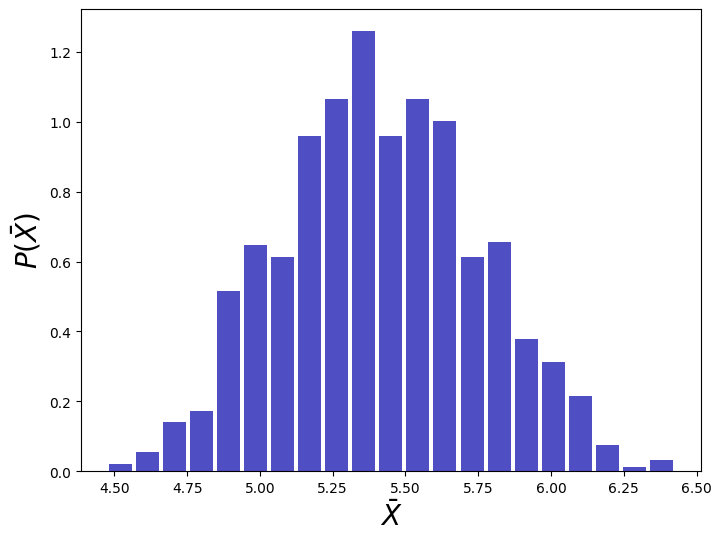

Média das amostras:  5.41185
Média da população:  5.4


In [46]:
# Função para a esperança
def esperanca(X, P):
    E = 0
    for i in range(0, len(X)):
        E = E + X[i]*P[i]
    return E

# Função para a variância
def variancia(X ,P):
    E = 0; E2 = 0
    for i in range(0, len(X)):
        E = E + X[i]*P[i]
        E2 = E2 + (X[i]**2)*P[i]
    V = E2-E**2
    return V

# Vetor de Eventos
X = [3,6,8]

# Vetor de Probabilidades
P = [0.4,0.3,0.3]

# Cálculo da Esperança
E = esperanca(X,P)

# Cálculo da Variância
V = variancia(X,P)

# Print das métricas
print("Esperança: ", E)
print("Variância: ", V)

# Tamanho de amostras
n = 40

# Número de simulações
ns = 1000

# Vetor vazio para armazenar a média amostral
vx = [] # armazena a média amostral

# Laço para as simulações
for s in range(0, ns):
    A = np.random.choice(X, n, p = P)
    vx.append(np.mean(A))

# Mostra o gráfico da distribuição criada
plt.figure(figsize=(8,6))
plt.hist(x=vx, bins='auto',color='#0504aa', alpha=0.7, rwidth=0.85, density = True)
plt.xlabel(r'$\bar{X}$', fontsize=20)
plt.ylabel(r'$P(\bar{X})$', fontsize=20)
plt.show()

# Compara as métricas da amostra e da população
print("Média das amostras: ", np.mean(vx))
print("Média da população: ", E)

## Tamanho Amostral

Ao se realizar uma amostra para inferir uma determinada função paramétrica (média, máximo ou outra função de um parâmetro), há um erro associado ao planejamento amostral. À medida que o tamanho da amostra aumenta, o erro do estimador decresce. Vale ressaltar que uma amostra muito grande pode implicar custos desnecessários, enquanto que uma amostra pequena pode tornar a pesquisa inconclusiva. Deste modo, o ponto chave de um levantamento amostral é determinar o tamanho da amostra. **Uma forma de garantir que o tamanho amostral seja significativo em relação à população, é ultilizado do Teorema Central do Limite.**

O Teorema do Limite Central afirma que, com o aumento do tamanho da amostra, a distribuição das médias amostrais se aproxima de uma distribuição normal com média igual à média da população e desvio padrão igual ao desvio padrão da variável original dividido pela raiz quadrada do tamanho da amostra. Este fato é assegurado para n maior ou igual a 30.

O desvio padrão das médias amostrais é conhecido como erro padrão da média.

## Níveis de Confiança e Significância

**O nível de confiança (1 - \alpha) representa a probabilidade de acerto da estimativa**. De forma complementar **o nível de significância (\alpha) expressa a probabilidade de erro da estimativa**. O nível de confiança representa o grau de confiabilidade do resultado da estimativa estar dentro de determinado intervalo. Quando fixado em uma pesquisa um nível de confiança de 95%, por exemplo, é assumindo que existe uma probabilidade de 95% dos resultados da pesquisa representarem bem a realidade, ou seja, estarem corretos.

## Erro Inferencial e Intervalo de Confiança

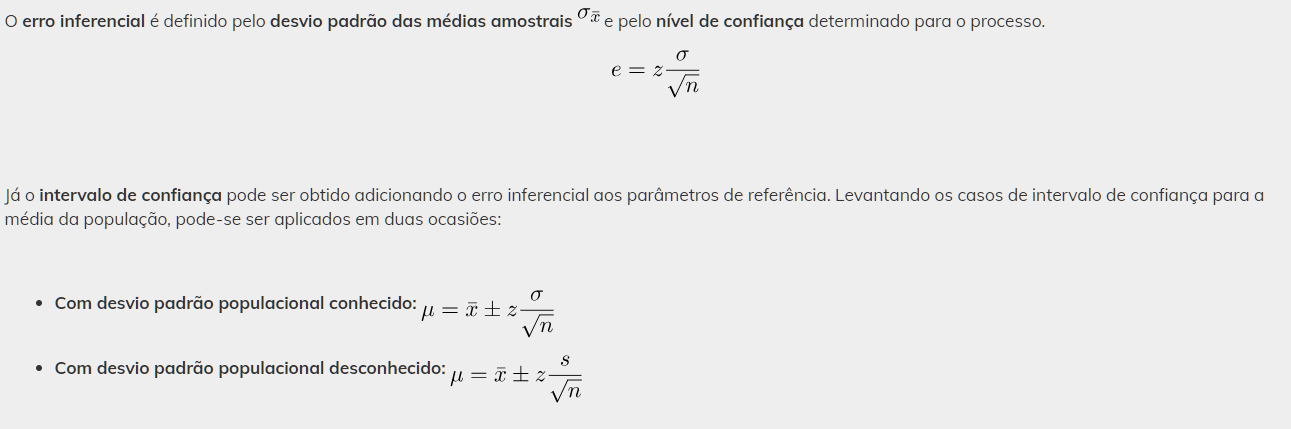


## Cálculo do Tamanho Amostral Baseado na Estimativa da Média Populacional

### População Infinita

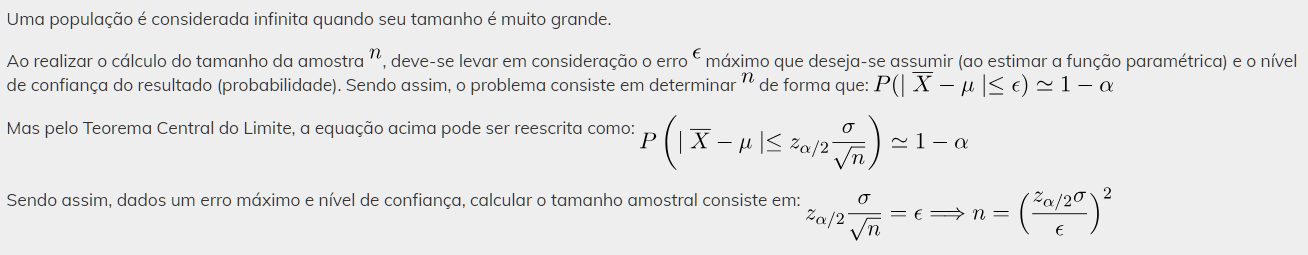

### População Finita

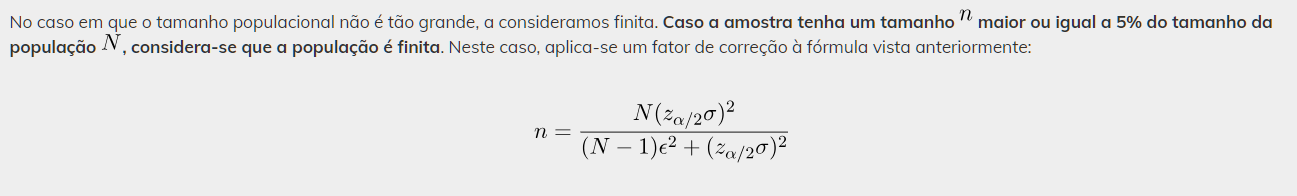

### Variância Populacional Desconhecida

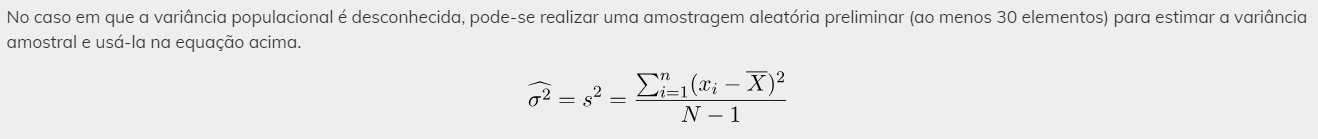

## EXERCÍCIOS

Suponha que os pesos das sacas de soja de uma indústria alimentícia se distribuem aproximadamente como uma normal de desvio padrão populacional igual a 570 g. Selecionada uma amostra aleatória de 25 sacas de um lote específico, obteve-se um peso médio de 27.215 g. Construa um intervalo de confiança para a média populacional assumindo um nível de significância de 10%.

In [ ]:
# Parâmetros para o teste
x = 27215 # Peso médio da amostra
desvpad = 570 # Desvio padrão
alpha = 0.10 # Nível de significância
conf = 1 - alpha # Nível de confiança
n = 25 # Amostra aleatória de 25 sacas de um lote (tamanho da amostra)

print(f"Intervalo de Confiança: {norm.interval(conf, loc = X, scale = desvpad / np.sqrt(n))}")

Intervalo de Confiança: (27027.486686527533, 27402.513313472467)


## ??? DÚVIDAS ???

O que consiste o erro inferencial? Não entendi!


# 6 - Teste de Hipóteses - **EM ANDAMENTO**

# 8 - Séries Temporais